In [1]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

In [7]:
cv_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\PythonVersion\PythonSimsRevamp\results"
fedavg_filename = "MAXITERSCIPYMIN_FEDAVG_CrossValResults.h5"

directory_str = "08-05_16-37_FEDAVG"
h5_path = os.path.join(cv_results_path, directory_str, fedavg_filename)
with h5py.File(h5_path, 'r') as f:
    a_group_key = list(f.keys())#[0]
    print(a_group_key)
    AvgCV_val_test_loss = f['AveragedCV_local_test_error_log'][()]
    AvgCV_val_train_loss = f['AveragedCV_local_train_error_log'][()]
    f0_val_test_loss = f['Fold0_local_test_error_log'][()]
    f0_val_train_loss = f['Fold0_local_train_error_log'][()]
    f1_val_test_loss = f['Fold1_local_test_error_log'][()]
    f1_val_train_loss = f['Fold1_local_train_error_log'][()]
    f2_val_test_loss = f['Fold2_local_test_error_log'][()]
    f2_val_train_loss = f['Fold2_local_train_error_log'][()]
    f3_val_test_loss = f['Fold3_local_test_error_log'][()]
    f3_val_train_loss = f['Fold3_local_train_error_log'][()]
    f4_val_test_loss = f['Fold4_local_test_error_log'][()]
    f4_val_train_loss = f['Fold4_local_train_error_log'][()]
    

['AveragedCV_local_test_error_log', 'AveragedCV_local_train_error_log', 'Fold0_local_test_error_log', 'Fold0_local_train_error_log', 'Fold1_local_test_error_log', 'Fold1_local_train_error_log', 'Fold2_local_test_error_log', 'Fold2_local_train_error_log', 'Fold3_local_test_error_log', 'Fold3_local_train_error_log', 'Fold4_local_test_error_log', 'Fold4_local_train_error_log']


## Purpose: Check if train is actually 0 or just way smaller than test

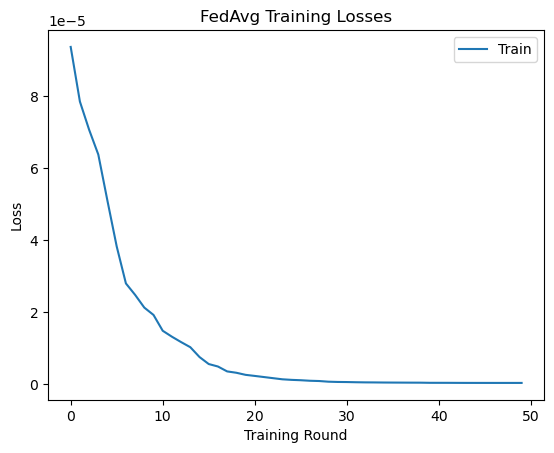

In [8]:
plt.plot(range(len(AvgCV_val_train_loss)), AvgCV_val_train_loss, label="Train")
#plt.plot(range(len(fedavg_val_test_loss)), fedavg_val_test_loss, label="Test")
#plt.plot(range(len(fedavg_val_train_loss)), fedavg_val_train_loss, label="Train")
#plt.plot(range(len(fedavg_val_test_loss)), fedavg_val_test_loss, label="Test")
plt.title("FedAvg Training Losses")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.legend()
plt.show()

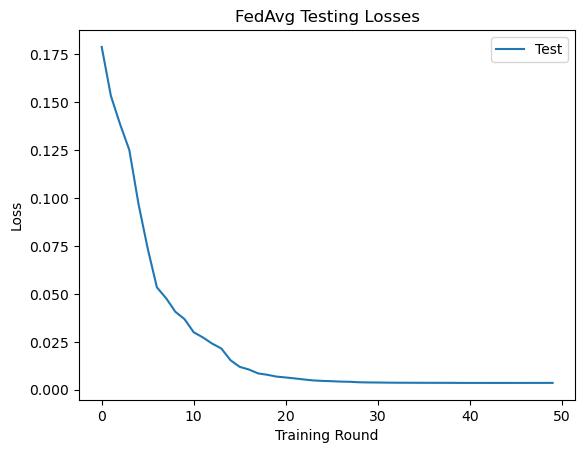

In [10]:
plt.plot(range(len(AvgCV_val_test_loss)), AvgCV_val_test_loss, label="Test")
#plt.plot(range(len(fedavg_val_test_loss)), fedavg_val_test_loss, label="Test")
#plt.plot(range(len(fedavg_val_train_loss)), fedavg_val_train_loss, label="Train")
#plt.plot(range(len(fedavg_val_test_loss)), fedavg_val_test_loss, label="Test")
plt.title("FedAvg Testing Losses")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.legend()
plt.show()

Curves look basically identical but just different magnitude... check how true this is...

In [11]:
AvgCV_val_test_loss[0]

0.17869986202988716

In [12]:
AvgCV_val_train_loss[0]

9.36997396456846e-05

In [13]:
AvgCV_val_train_loss[0]/AvgCV_val_test_loss[0]

0.0005243414213157787

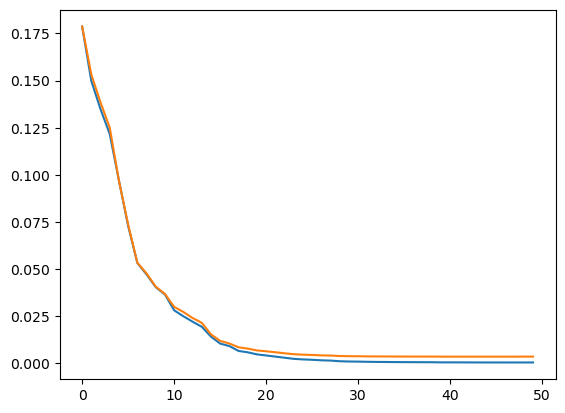

In [16]:
plt.plot(AvgCV_val_train_loss/(AvgCV_val_train_loss[0]/AvgCV_val_test_loss[0]), label="Scaled")
plt.plot(AvgCV_val_test_loss, label="Original")

Trend is exactly the same... minor differences could be numerical rounding error / slightly biased first value...

## Purpose: Check if all folds have the same curves / why they weren't showing up on final plot

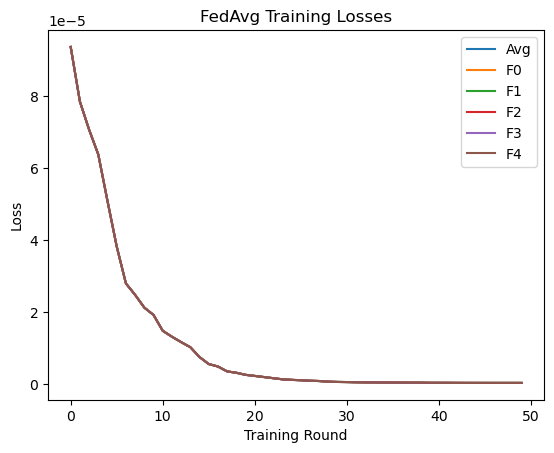

In [19]:
plt.plot(range(len(AvgCV_val_train_loss)), AvgCV_val_train_loss, label="Avg")
plt.plot(range(len(f0_val_train_loss)), f0_val_train_loss, label="F0")
plt.plot(range(len(f1_val_train_loss)), f1_val_train_loss, label="F1")
plt.plot(range(len(f2_val_train_loss)), f2_val_train_loss, label="F2")
plt.plot(range(len(f3_val_train_loss)), f3_val_train_loss, label="F3")
plt.plot(range(len(f4_val_train_loss)), f4_val_train_loss, label="F4")
plt.title("FedAvg Training Losses")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.legend()
plt.show()

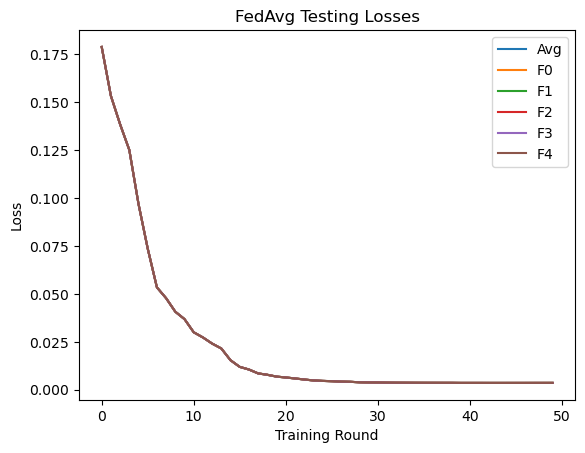

In [20]:
plt.plot(range(len(AvgCV_val_test_loss)), AvgCV_val_test_loss, label="Avg")
plt.plot(range(len(f0_val_test_loss)), f0_val_test_loss, label="F0")
plt.plot(range(len(f1_val_test_loss)), f1_val_test_loss, label="F1")
plt.plot(range(len(f2_val_test_loss)), f2_val_test_loss, label="F2")
plt.plot(range(len(f3_val_test_loss)), f3_val_test_loss, label="F3")
plt.plot(range(len(f4_val_test_loss)), f4_val_test_loss, label="F4")
plt.title("FedAvg Testing Losses")
plt.xlabel("Training Round")
plt.ylabel("Loss")
plt.legend()
plt.show()

Clearly, something is wrong... either cv_results indices are not being updated... or the actual data/models are not changing between folds (could be resetting but running on the same)...